## 문서 유사도
: 특정 문서가 다른 문서와 유사도 또는 얼마나 다른지 등을 측정하는걸 통틀어 말한다<br>
-> Cosine Similarity, Jaccard Similarity를 많이 쓴다.<br>
<br><img src=https://blog.kakaocdn.net/dn/bxjWi1/btrF9g1X0nh/4nmQAf96mMWmJa5JZdZemK/img.png width=1000>

### 코사인 유사도
두 벡터간의 각도를 통해 유사도를 측정<br>
-> 서로 0도이면 유사해서 Cos(0)=1, 서로 90도이면 관련 없어서 Cos(90)=0, 서로 180도이면 반대관계 Cos(180)=-1<br>
<br><img src=https://blog.kakaocdn.net/dn/mZusN/btrF4GBiLGp/78oQUDLnwin7VaFhFvg330/img.png width=1000>

D0와 D2가 '머신러닝', '부스팅' 2개 모두 값을 갖기 때문에 방향성이 더 맞고,<br>
cos값이 1에 가깝기 때문에 더 유사하다. (크기가 유사한건 D0과 D1이지만 방향성이 더 중요!)<br>
<br><img src=https://blog.kakaocdn.net/dn/FTqOZ/btrF7ecKiad/PZBpLYhUhtOJzuke7K8dKK/img.png width=1000>

### 사이킷런 cosine_similarity()
각 행에 대해 n개 단어(피처)차원의 벡터끼리 Cos값을 구해 표로 생성 -> 대칭 행렬<br>
<br><img src=https://blog.kakaocdn.net/dn/clRb3H/btrF4u8U5dP/ILJsr8gZaLiWXoOLrYedV0/img.png width=1000>

## 문서 유사도 측정 실습 – 코사인 유사도

### **코사인 유사도 반환 함수 생성**

In [6]:
import numpy as np

# v1과 v2 벡터의 Cosine 값을 리턴(-1 ~ 1 사이 float)
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2) # v1, v2 내적
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2)))) # (v1 제곱의 합 -> 루트) 곱하기 (v2 제곱의 합 -> 루트)
    similarity = dot_product / l2_norm     
    
    return similarity

### **TF-IDF 벡터화 후 코사인 유사도 비교**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 3개 문장 - 코사인 유사도 비교
doc_list = ['if you take the blue pill, the story ends' , # 파란약 - 끝
            'if you take the red pill, you stay in Wonderland', # 빨간약 - 새로운 세상
            'if you take the red pill, I show you how deep the rabbit hole goes'] # 빨간약 - 수렁

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(f"3개 문장에 대해 tfidf 벡터화 결과 18개 피처(단어) 생성됨: {feature_vect_simple.shape}")

3개 문장에 대해 tfidf 벡터화 결과 18개 피처(단어) 생성됨: (3, 18)


In [8]:
# feature_vect_simple는 sparse 매트릭스라 -> csr matrix 타입 
print(type(feature_vect_simple))
# -> todense()를 이용해 행렬로 바꿔야 한다.
print(feature_vect_simple.todense()) # (3, 18)

<class 'scipy.sparse.csr.csr_matrix'>
[[0.4155636  0.         0.4155636  0.         0.         0.
  0.24543856 0.         0.24543856 0.         0.         0.
  0.         0.4155636  0.24543856 0.49087711 0.         0.24543856]
 [0.         0.         0.         0.         0.         0.
  0.23402865 0.39624495 0.23402865 0.         0.3013545  0.
  0.39624495 0.         0.23402865 0.23402865 0.39624495 0.4680573 ]
 [0.         0.30985601 0.         0.30985601 0.30985601 0.30985601
  0.18300595 0.         0.18300595 0.30985601 0.23565348 0.30985601
  0.         0.         0.18300595 0.3660119  0.         0.3660119 ]]


In [13]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

In [14]:
print(np.array(feature_vect_dense[0]).shape) # reshape 해서 1차원 만들기
print(np.array(feature_vect_dense[0]).reshape(-1,).shape)

(1, 18)
(18,)


In [15]:
#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,) # 첫번째 문장 -> reshape 해서 1차원 만들기
vect2 = np.array(feature_vect_dense[1]).reshape(-1,) # 두번째 문장

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1 - 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1 - 문장 2 Cosine 유사도: 0.402


In [10]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1 - 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2 - 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1 - 문장 3 Cosine 유사도: 0.404
문장 2 - 문장 3 Cosine 유사도: 0.456


### 사이킷런 cosine_similarity
**사이킷런의 cosine_similarity()함수를 이용하여 비교**

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine_similarity는 워낙 sparse 매트릭스가 많이 쓰이기 때문에, np.array 아니고 csr_matrix 넣어도 된다.
print(type(feature_vect_simple[0]), type(feature_vect_simple))
# 문장1을 전체 문장(문장1~3)과 비교
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(f"\n문장1과 문장1,2,3 비교한 결과\n{similarity_simple_pair}")

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>

문장1과 문장1,2,3 비교한 결과
[[1.         0.40207758 0.40425045]]


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# 비교 대상에서 0을 제외( [1:] )함으로써 자기자신과 비교하는것 제외
similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [21]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('\nshape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]

shape: (3, 3)


## Opinion Review 데이터 셋 -문서 유사도 측정

### 데이터 로드 및 LemNormalize 함수 정의

In [25]:
from nltk.stem import WordNetLemmatizer
import nltk
import string
import warnings
warnings.filterwarnings('ignore')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [30]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 디렉토리 설정
path = '../data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in sorted(all_files):
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

# 3개의 클러스터로 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [31]:
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
1,bathroom_bestwestern_hotel_sfo,...,2
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,0
4,battery-life_netbook_1005ha,...,0


In [33]:
hotel_indexex = document_df[document_df['cluster_label']==2].index
hotel_indexex, hotel_indexex.shape # 16개

(Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64'),
 (16,))

### 호텔(cluster 2) 데이터 확인
**호텔로 클러스터링 된 문서(cluster_label 2번)중에서 비슷한 문서를 추출**

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print(f'호텔로 클러스터링 된 문서들의 DataFrame Index\n{hotel_indexes}') # 16개

호텔로 클러스터링 된 문서들의 DataFrame Index
Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


In [48]:
# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 첫번째 문서:',comparison_docname)

# 호텔 클러스터링된 feature_vect 추출 
# -> 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(f"호텔로 클러스터링 된 문서들중, 첫번째 문서와 나머지 문서 cosine 유사도\n{similarity_pair}")

##### 비교 기준 첫번째 문서: bathroom_bestwestern_hotel_sfo
호텔로 클러스터링 된 문서들중, 첫번째 문서와 나머지 문서 cosine 유사도
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.51442299 0.38038865 0.32619948 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


### 호텔 - 첫번째 문서와, 나머지 문서 비교
1) 호텔클러스터의 인덱스 추출 -> hotel_indexes<br>
2) 첫 번째 문서와 Cos 유사도 구해서 내림 차순 -> sorted_index<br>
3) sorted_index를 hotel_indexes에 적용하여 Cos 유사도 내림차순으로 문서 인덱스 정렬 -> hotel_sorted_indexex

In [50]:
similarity_pair.argsort()[:,::-1]

array([[ 0,  8,  9, 10, 12, 13,  7, 11, 14, 15,  5,  3,  4,  2,  1,  6]])

In [54]:
import sys
sys.path.append('../modules/')
from modules.graph import graph_style
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
graph_style()

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1] # hotel_indexes 기준 유사도 내림차순으로
sorted_index = sorted_index[:, 1:] # 자기자신 제외
print(f"sorted_index: {sorted_index.reshape(-1,)}")

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
print(f"hotel_indexes: {hotel_indexes}") # hotel_indexes에서 유사도 내림차순으로 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]
print(f"\nhotel_indexes에서 sorted_index순으로 정렬하면 유사도 내림차순으로 hotel_indexes를 정렬\nhotel_sorted_indexes:{hotel_sorted_indexes}")

sorted_index: [ 8  9 10 12 13  7 11 14 15  5  3  4  2  1  6]
hotel_indexes: Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')

hotel_indexes에서 sorted_index순으로 정렬하면 유사도 내림차순으로 hotel_indexes를 정렬
hotel_sorted_indexes:Int64Index([30, 31, 32, 39, 40, 28, 38, 45, 46, 21, 15, 20, 14, 13, 24], dtype='int64')


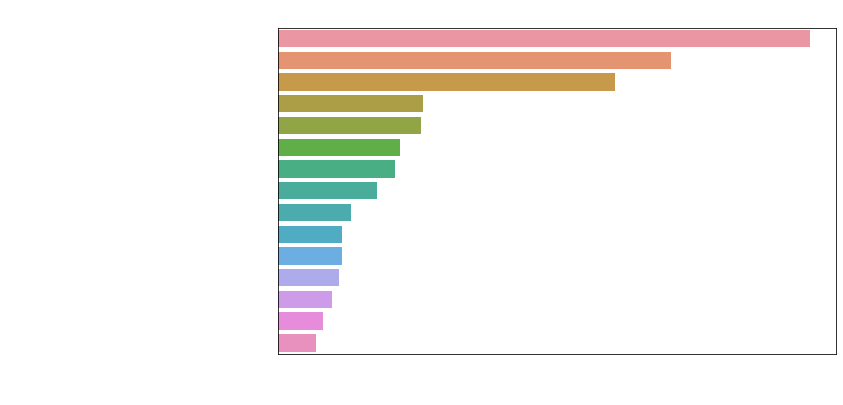

In [55]:
# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# hotel_sorted_indexes를 이용해
# 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)
plt.show()